In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['savefig.dpi'] = 300  # Ensure a high resolution

In [20]:
# dataset_name = 'juvenile'
# config_file = '../dataset_configs/juvenile_dataset.json'
dataset_name = 'juvenile_dfovf'
dataset_name = 'juvenile_noise_std0p2'
dataset_name = 'juvenile_noise_std0p5'
config_file = f'../../{dataset_name}_dataset/notebooks/{dataset_name}_dataset.json'


from analysis_config import juvenile_window_name_to_frames
window_name = 'time_window_3s'
# window_name = 'time_window_5s'
# window_name = 'time_window_7s'
frame_window = juvenile_window_name_to_frames[window_name]
print(window_name, frame_window)

import os
fig_dir = f'../figures/{dataset_name}/{window_name}/mean_response'
os.makedirs(fig_dir, exist_ok=True)

time_window_3s [38, 63]


In [21]:
from catrace.response import run_response, RunResponseParams, load_all_dff
from catrace.visualize import PlotBoxplotByCondParams
from catrace.dataset import load_dataset_config
from catrace.stats import sort_conditions

dsconfig = load_dataset_config(config_file)
dff = load_all_dff(dsconfig)
dff = sort_conditions(dff.T, dsconfig.conditions).T

2021-07-15-DpOBEM-N2_Dp None
2021-07-16-DpOBEM-N3_Dp None


2021-12-10-DpOBEM-N4_Dp None
2021-12-31-DpOBEM-N7_Dp None
2022-02-13-DpOBEM-N10_Dp None
2022-02-20-DpOBEM-N11_Dp None
2021-02-05-DpOBEM-JH9_Dp None
2021-03-18-DpOBEM-JH10_Dp None
2021-03-19-DpOBEM-JH10_Dp None
2021-04-02-DpOBEM-JH11_Dp None
2021-04-03-DpOBEM-JH11_Dp None
2021-05-01-DpOBEM-JH13_Dp None
2021-05-22-DpOBEM-JH14_Dp None
2021-09-15-DpOBEM-JH20_Dp None
2021-09-17-DpOBEM-JH20_Dp None
2021-09-18-DpOBEM-JH20_Dp None
2021-07-30-DpOBEM-JH17_Dp None
2021-07-31-DpOBEM-JH17_Dp None
2021-09-02-DpOBEM-JH18_Dp None
2021-09-03-DpOBEM-JH18_Dp None
2021-09-04-DpOBEM-JH18_Dp None
2021-09-29-DpOBEM-JH21_Dp None
2021-10-01-DpOBEM-JH21_Dp None
2021-10-02-DpOBEM-JH21_Dp None
2021-10-14-DpOBEM-JH22_Dp None
2021-11-10-DpOBEM-JH23_Dp None
2021-11-11-DpOBEM-JH23_Dp None
2021-11-14-DpOBEM-JH23_Dp None
2021-11-24-DpOBEM-JH24_Dp None
2021-11-27-DpOBEM-JH24_Dp None
2021-11-26-DpOBEM-JH24_Dp None


/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/process_time_trace.py:200: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(level='odor').mean()


    Contrast        A        B  Paired  Parametric          T           dof  \
0  condition  arg-phe    naive   False        True   6.712431  62697.787611   
1  condition  arg-phe  phe-arg   False        True -15.587095  79167.056917   
2  condition  arg-phe  phe-trp   False        True  -8.841832  47172.726292   
3  condition    naive  phe-arg   False        True -21.809341  64001.379168   
4  condition    naive  phe-trp   False        True -14.349890  45673.194339   
5  condition  phe-arg  phe-trp   False        True   4.361256  48279.284301   

  alternative          p-unc        BF10    hedges  
0   two-sided   1.930315e-11   5.351e+07  0.051840  
1   two-sided   1.074726e-54   3.725e+50 -0.110742  
2   two-sided   9.733822e-19   8.544e+14 -0.074070  
3   two-sided  4.575068e-105  7.026e+100 -0.166034  
4   two-sided   1.347917e-46   4.111e+42 -0.129855  
5   two-sided   1.295856e-05     124.993  0.036013  
{
    "Kruskal": {
        "statistic": 649.649047738174,
        "p_value"

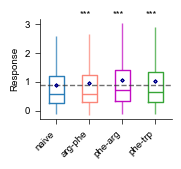

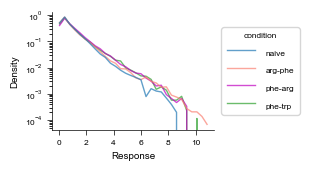

In [22]:
color_dict = {'naive': 'tab:blue', 
              'arg-phe': 'salmon',
              'phe-arg': 'm',
              'phe-trp': 'tab:green',
}
colors = [color_dict[c] for c in dsconfig.conditions]
# colors = ['tab:blue', 'tab:brown', 'tab:green', 'm']
boxplot_params = PlotBoxplotByCondParams(
    figsize=(2.0, 1.8),
    do_plot_strip=False,
    hline_linewidth=1.0,
    mean_marker_size=0.5,
    box_linewidth=1,
    box_colors=colors,
    mean_marker_color='darkblue')
histplot_params = dict(
    binwidth=0.05 * dsconfig.frame_rate,
    log_scale=True,
    figsize=(3.2, 1.8),
    label_fontsize=7,
    tick_label_fontsize=6,
    colors = colors,
    linewidth=1,
    alpha=0.7,
)
params = RunResponseParams(
    dff = dff,
    dsconfig = dsconfig,
    time_window = frame_window,
    top_ratio = None,
    odor_key = 'odors_aa',
    boxplot_params = boxplot_params,
    histplot_params = histplot_params,
)

resp, test_results, fig_box, fig_hist = run_response(params)
import json
print(json.dumps(test_results, indent=4))

In [23]:
from catrace.stats import format_test_results_by_cond
print(format_test_results_by_cond(test_results))

(Kruskal–Wallis test, n = 129633, d.f. = 3, H = 649.65, P = 1.7 × 10^-140). Group statistics: arg-phe: mean = 0.95 ± 1.06 (n = 39039); naive: mean = 0.90 ± 0.93 (n = 27177); phe-arg: mean = 1.07 ± 1.10 (n = 40137); and phe-trp: mean = 1.03 ± 1.11 (n = 23280). Nonparametric multiple comparisons against naive (n = 27177): arg-phe, Q = 6.71, P = 5.8 × 10^-11, n = 27177; phe-arg, Q = 21.81, P = 1.4 × 10^-104, n = 40137; and phe-trp, Q = 14.35, P = 4.0 × 10^-46, n = 23280.


In [24]:
from catrace.for_paper import save_figure_for_paper, save_stats_json

fig_name = f'{dataset_name}_response_{params.odor_key}_boxplot'
save_figure_for_paper(fig_box, fig_name, fig_dir)
save_stats_json(test_results, fig_name, fig_dir)

fig_name = f'{dataset_name}_response_{params.odor_key}_histplot'
save_figure_for_paper(fig_hist, fig_name, fig_dir)